In [1]:
import Statistics.std
using Statistics

#### CHEM 4H03 Assignment #1: 
###### Ernest Spahiu 400197077 spahiue

##### Q2: Monte Carlo 
a\): As the number n of temperature measurements is large, X_hat can be considered as an i.i.d sample X1, X2, ..., Xn from a normal distribution with pop mean = 0 and and pop std devation ~= 1.

 Firstly, we are zeroing out the samples by subtracting the sample mean x_bar from each measurement, which will center the result around 0. Then, according to the Central Limit Theorem, as the number of samples n increases, the distribution of measurements Xi will approach a normal distribution. As n reaches a sufficiently high number, the sample mean will aslo approach the population mean, as it becomes more representative of the overall pop. Due to zeroing in the previous step, this will result in a mean = 0. The error in the sample mean will also decrease with higher n values, meaning the std deviation with decrease and make the assumption reasonable.

b\) normalization function

In [2]:
#repeated measurements of a certain temperature that are i.i.d samples X1, X2, X3,
# Xi_hat = (Xi - Xbar)/Sx, where Xbar is the sample mean and Sx is the sample standard deviation

# spits out a normalized Xi_hat, the sample mean used, and the sample standard deviation used
function normalization(Xi_temperatures)
    Xbar = mean(Xi_temperatures);
    Sx = std(Xi_temperatures);
    Xi_hat = (Xi_temperatures .- Xbar)./Sx;
    return (Xi_hat, Xbar, Sx);
end

#test the fxn
Xi_temperatures = [67.0, 66.3, 66.9, 67.2, 66.3];
display(mean(Xi_temperatures))
display(std(Xi_temperatures))
display(normalization(Xi_temperatures));

66.74000000000001

0.41593268686171125

([0.6251011478846223, -1.0578634810355805, 0.3846776294674652, 1.105948184718971, -1.0578634810355805], 66.74000000000001, 0.41593268686171125)

c\) reverse-normalization function

In [3]:
function reverseNormalization(Xi_hat, Xbar, Sx)
    reverseNormalization = (Xi_hat .* Sx) .+ Xbar
    return reverseNormalization
end

#test the fxn
Xi_temperatures = [-0.4, 1.5, -0.9, 0.3];
display(reverseNormalization(Xi_temperatures, 67, 0.5));

4-element Vector{Float64}:
 66.8
 67.75
 66.55
 67.15

##### Q3: Monte Carlo 
a\): Monte Carlo approx of f = x -> ℯ^(-x.^2)
need to solve the integral for the error function from 0 to 5 using monte carlo integration  
    1. get a x sample = uniform distribution from a to b, n times  
    2. plug the x sample into the function and sum it up  
    3. multiply sum by (b-a) and divide by n to get the mean estimate  


In [4]:
import Pkg; Pkg.add("SpecialFunctions")
f = x -> ℯ^(-x.^2)

#need to solve the integral for the error function from 0 to 5 using monte carlo integration
function monteCarloIntegration(f, n, a, b)
    #1) get a x sample = uniform distribution from a to b, n times
    sum = 0;
    for i in 1:n
        x = rand(a:0.001:b)
        #2) plug the x sample into the function and sum it up
        sum += f(x)
    end
    #3) multiply sum by (b-a) and divide by n to get the mean estimate
    meanEstimate = ((b-a)/n) * sum
    return meanEstimate
end 

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


monteCarloIntegration (generic function with 1 method)

b\) testing the function  

In [15]:
#b) test the fxn
using SpecialFunctions
println("Results")
println(monteCarloIntegration(f, 1000000, 0, 5))
println(erf(5)/(2/√(π)))

Results


0.8875597684685792
0.8862269254513955


c\) trying the function with different n values  

As seen below, the result of the Monte Carlo integration will converge to the actual value of the integral as the number of samples being taken increases, reducing error. This is a direct consequence of the central limit theorem, which tells us that the sample mean will approach the true mean and the expected error (std dev) will scale with $\sqrt{n}$, therefore the improvement in accuracy is expected.

In [6]:
#c) testing with different n values
println("n = 1:     ")
println(monteCarloIntegration(f, 1, 0, 5) * 2/√(π))
println("n = 10:    ")
println(monteCarloIntegration(f, 10, 0, 5) * 2/√(π))
println("n = 1000:   ")
println(monteCarloIntegration(f, 1000, 0, 5) * 2/√(π))
println("n = 1000000:   ")
println(monteCarloIntegration(f, 1000000, 0, 5) * 2/√(π))

n = 1:     
5.1501000932502325
n = 10:    
0.9428607895151243
n = 1000:   
0.9131410431769766
n = 1000000:   


1.0022029550884928


d\) 2D integration of f(x) = 3.2*(4.2 - x)*(x.^2 + 3*y.^2)  

Since it is a double integral, the first change is to sample both x and y, each over their respective ranges. The function will now estimate the integral over a greater rectangular area, u, which contains the actual volume. To get the actual volume, an indicator fxn/if condition should discard any values that are outside the actual volume, based on the given inequalities. 

For x: 0<= x <= 4.2  
For y: x^2 >= 3y^2

This region is seen in the picture as the area where all segments overlap  

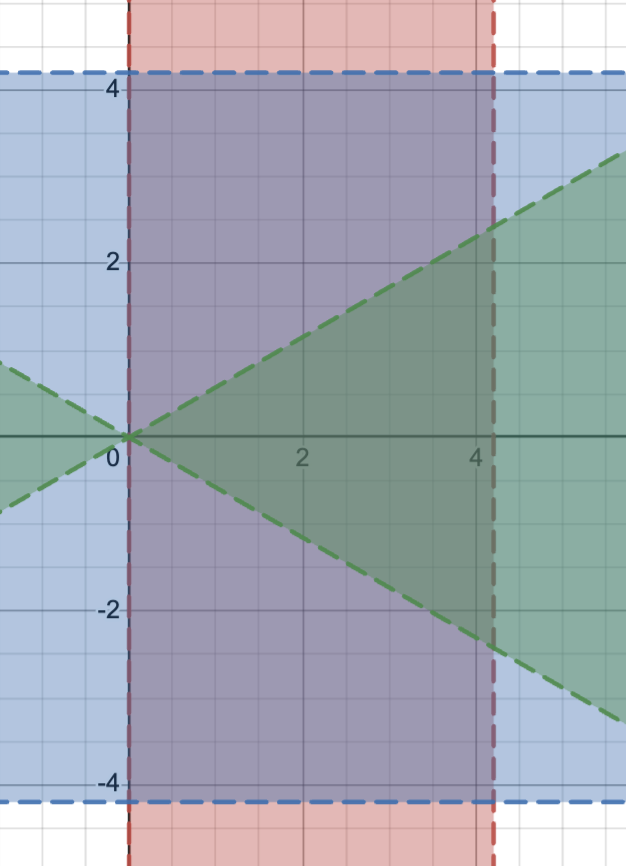

In [7]:
#d) laminar flow, with 2d integral
f2(x, y) = 3.2*(4.2 - x)*(x.^2 - 3*y.^2)

#need 2 sets of bounds, one for inner integral and one for outer
function monteCarloIntegration2D(f, n, a1, b1, a2, b2)
    sum = 0
    for i in 1:n

        x = rand(a1:0.0001:b1)
        if (x <= 0 || x >= 4.2)
            continue
        end

        y = rand(a2:0.0001:b2)
        if !(x.^2 >= 3*y.^2) 
            continue
        end

        sum += f(x, y)
    end
    
    meanEstimate = ((b1-a1)*(b2-a2)/n) * sum
    return meanEstimate
end

#boundaries are: 0<x<4.2, -4.2<y<4.2
println(monteCarloIntegration2D(f2, 1000000, 0, 4.2, -4.2, 4.2))

160.20979283451933


Q4:
Ax = b, to be solved for A E R(mxn) and b e R(m)

To understand why any solution x can be considered a set of constrained directions from the origin 0 to a destination, we can :
1) look at the dimensions of b. The solution b is constrained to have the same number of rows as A and the same number of columns as x, and will net a Mx1 vector in this given case. 
2) decompose B into the outer product of A and x (b = A*x). This will result in 3 matrices that are created by multiplying the columns vectors of A by the tranpose row vectors of x, and summing them will give us b. Each of these matrices will represent an arrow/path, that starts at the origin and ends at the destination location b. 

As an example, if we have a 2x3 matrix A and a 3x1 vector x, the resulting vector b will be a 2x1 matrix, and can be found by A/x. As seen below, each resulting matrix represents a single path from the origin to the destination b. In this example, the path is constrained to 2 dimensions, and follows the path given by vector addition to b.

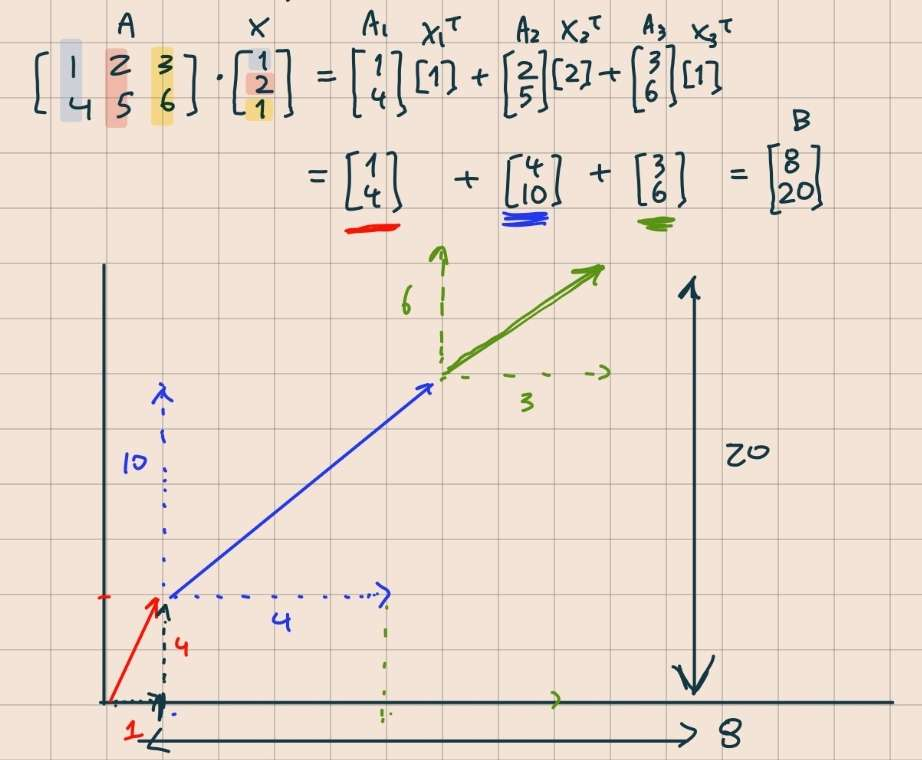

In [8]:
function sumOuterProd(matrix)
    len = size(matrix, 1)
    result = zeros(len, len);
    for i in 1:len
        for j in 1:len
            display(matrix[i, :] .* matrix[:, j]')
        end
    end

    return result
end

A = [1 2 3; 4 5 6];
x = [1 2 1];
display(sumOuterProd(A))


3×2 Matrix{Int64}:
 1   4
 2   8
 3  12

3×2 Matrix{Int64}:
 2   5
 4  10
 6  15

3×2 Matrix{Int64}:
 4  16
 5  20
 6  24

3×2 Matrix{Int64}:
  8  20
 10  25
 12  30

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0